### Overal Working List
1. load three files and combine them
2. get the missing percentage of all columns and delete those which have more than 50% values missing(pick up the threshold from histogram)
3. calculate mutual information and select features based on that
4. feature engineering: apply binning to price range variable

In [1]:
import pandas as pd
import numpy as np
user=pd.read_csv('cleaned_phase1_user_restaurant.csv')
review=pd.DataFrame(pd.read_csv('cleaned_phase1_review_restaurant.csv'))
business=pd.DataFrame(pd.read_csv('clean_phase1_business_restaurant.csv'))
user=user.drop(user.columns[0],1)
review=review.drop(review.columns[0],1)
business=business.drop(business.columns[0],1)

In [2]:
pd.set_option('display.max_columns',None)

In [4]:
user.head()

,compliments.more_user,compliments.plain_user,compliments.photos_user,user_id_user,compliments.hot_user,compliments.cute_user,compliments.note_user,compliments.profile_user,compliments.cool_user,average_stars_user,compliments.funny_user,compliments.writer_user,review_count_user,fans_user,compliments.list_user,friend_count_user,elite_year_count_user,not_elite_yr_till_user,user_life_user,votes_total_user
0,3.0,25.0,14.0,18kPq7GPye-YQ3LyKyAZPw,48.0,15.0,20.0,8.0,76.0,4.14,11.0,9.0,108,69,NaN,200,2,10.0,13,695
1,137.0,970.0,361.0,rpOyqD_893cqmDAtJLbdog,1111.0,204.0,611.0,117.0,1675.0,3.67,594.0,346.0,1292,1345,38.0,1939,12,0.0,13,35732
2,18.0,86.0,27.0,4U9kSBLuBDU391x6bxU-YA,99.0,22.0,79.0,9.0,134.0,3.68,96.0,24.0,395,105,4.0,422,11,1.0,13,2728
3,NaN,NaN,NaN,fHtTaujcyKvXglE33Z5yIw,NaN,2.0,NaN,NaN,NaN,4.64,NaN,NaN,11,2,NaN,4,0,NaN,13,17
4,1.0,2.0,NaN,SIBCL7HBkrP4llolm4SC2A,1.0,2.0,1.0,NaN,1.0,3.80,NaN,2.0,66,5,NaN,4,1,11.0,13,66


In [5]:
business.head()

,Waiter Service,Dietary Restrictions.vegetarian,Order at Counter,Good For.latenight,open,Price Range,Music.video,Business_star,Accepts Credit Cards,Alcohol,view_count,Takes Reservations,Good For.dinner,Caters,Good For Groups,Wheelchair Accessible,Dietary Restrictions.soy-free,Parking.valet,Delivery,Dietary Restrictions.kosher,business_id,Music.dj,Open 24 Hours,Dietary Restrictions.dairy-free,Dietary Restrictions.gluten-free,Dietary Restrictions.vegan,Good for Kids,Music.karaoke,Parking.lot,Good For.brunch,Wi-Fi,Good For Dancing,Good For.dessert,Good For.breakfast,Happy Hour,Music.jukebox,Noise Level,Ages Allowed,By Appointment Only,Good For.lunch,Dietary Restrictions.halal,Take-out,Has TV,Outdoor Seating,Drive-Thru,Smoking,Corkage,Attire,Parking.validated,Music.background_music,Music.live,Parking.garage,BYOB,Accepts Insurance,Parking.street,Dogs Allowed,Coat Check,Ambience_score
0,0.0,NaN,NaN,0.0,1,1.0,NaN,3.5,1.0,0.0,7,0.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,5UmKMjUEUNdYWqANhGckJw,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0
1,1.0,NaN,NaN,0.0,1,2.0,NaN,4.5,1.0,1.0,26,0.0,0.0,1.0,1.0,NaN,NaN,0.0,0.0,NaN,mVHrayjG3uZ_RLHkLj-AMg,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1
2,1.0,NaN,NaN,0.0,1,1.0,NaN,4.0,1.0,1.0,23,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,KayYbHCt-RkbGcPdGOThNg,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,NaN,0.0,NaN,1.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1
3,1.0,NaN,NaN,0.0,1,1.0,NaN,3.5,1.0,0.0,10,0.0,0.0,NaN,1.0,1.0,NaN,0.0,0.0,NaN,wJr6kSA5dchdgOdwH6dZ2w,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0
4,1.0,NaN,NaN,0.0,1,1.0,NaN,4.0,1.0,1.0,10,0.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,fNGIbpazjTRdXgwRY_NIXA,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1


In [6]:
review.head()

,stars,text,user_id,business_id,review_id,existing_yr,Label,review_length
0,4,"Mr Hoagie is an institution. Walking in, it do...",PUFPaY9KxDAcGqfsorJp3Q,5UmKMjUEUNdYWqANhGckJw,Ya85v4eqdd6k9Od8HbQjyA,5,0,453
1,5,Excellent food. Superb customer service. I mis...,Iu6AxdBYGR4A0wspR9BYHA,5UmKMjUEUNdYWqANhGckJw,KPvLNJ21_4wbYNctrOwWdQ,3,0,136
2,5,Yes this place is a little out dated and not o...,auESFwWvW42h6alXgFxAXQ,5UmKMjUEUNdYWqANhGckJw,fFSoGV46Yxuwbr3fHNuZig,2,1,380
3,3,PROS: Italian hoagie was delicious. Friendly ...,qiczib2fO_1VBG8IoCGvVg,5UmKMjUEUNdYWqANhGckJw,pVMIt0a_QsKtuDfWVfSk2A,2,0,298
4,2,First the only reason this place could possibl...,qEE5EvV-f-s7yHC0Z4ydJQ,5UmKMjUEUNdYWqANhGckJw,AEyiQ_Y44isJmNbMTyoMKQ,1,1,1052


In [7]:
review_user=review.merge(user,left_on='user_id',right_on='user_id_user',how='inner')
review_user=review_user.drop('user_id_user',1)
review_user_business=review_user.merge(business,on='business_id',how='inner') 

In [8]:
review_user_business=review_user_business.drop(['user_id','business_id'],1)

In [45]:
review_user_business.to_csv('Phase2_combined.csv')

### Getting down to missing value

1. delete columns with missing values more tha half
2. find the rest of columns with missing value.
3. check the missing type and fill the missing part,. In this case, all are categorical variables, so add -1 dimension to indicate it is missing

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
null_percent=[np.true_divide(review_user_business[review_user_business[i].isnull()].shape[0],1630712.0) for i in review_user_business.columns.values]

(array([ 33.,   7.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,
          1.,   1.,   0.,   1.,   0.,   2.,   0.,   3.,   2.,   3.,   1.,
          2.,   2.,   2.,   4.,   1.,   9.]),
 array([ 0.        ,  0.01999866,  0.03999733,  0.05999599,  0.07999465,
         0.09999332,  0.11999198,  0.13999064,  0.15998931,  0.17998797,
         0.19998663,  0.21998529,  0.23998396,  0.25998262,  0.27998128,
         0.29997995,  0.31997861,  0.33997727,  0.35997594,  0.3799746 ,
         0.39997326,  0.41997193,  0.43997059,  0.45996925,  0.47996792,
         0.49996658,  0.51996524,  0.53996391,  0.55996257,  0.57996123,
         0.59995989,  0.61995856,  0.63995722,  0.65995588,  0.67995455,
         0.69995321,  0.71995187,  0.73995054,  0.7599492 ,  0.77994786,
         0.79994653,  0.81994519,  0.83994385,  0.85994252,  0.87994118,
 

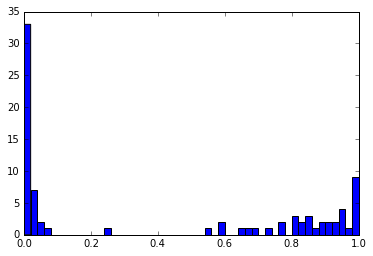

In [49]:
plt.hist(null_percent,bins=50)

In [41]:
null_percent

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.72753190017611935,
 0.54773620357242725,
 0.77711331001427597,
 0.66860671902825264,
 0.85749905562723527,
 0.59057209366215491,
 0.84783517874400871,
 0.5975138467123563,
 0.0,
 0.6814532547746015,
 0.64000571529491412,
 0.0,
 0.0,
 0.89689718356153636,
 0.0,
 0.0,
 0.76627877884016304,
 0.0,
 0.0,
 0.019777863902393555,
 0.98930221890805981,
 0.9436037755287261,
 0.013291126820677103,
 0.0,
 0.0045618110371420583,
 0.92729556169329719,
 0.0,
 0.043873473672849654,
 0.019996786679683475,
 0.0,
 0.010427960302003051,
 0.013291126820677103,
 0.06739755395189341,
 0.0059090752996237223,
 0.23999087515146758,
 0.98930221890805981,
 0.021966478446224718,
 0.011799753727206276,
 0.98930221890805981,
 0.84998822600189361,
 0.95385083325565767,
 0.98930221890805981,
 0.98930221890805981,
 0.98930221890805981,
 0.0067357080833402834,
 0.94357801990786849,
 0.021966478446224718,
 0.013434622422598227,
 0.049371685496887252,
 0.81871170384470093,
 0.0134517

In [43]:
null_percent_dict={}
for i in range(len(review_user_business.columns.values)):
    null_percent_dict[review_user_business.columns.values[i]]=null_percent[i]

In [44]:
null_percent_dict

{'Accepts Credit Cards': 0.043873473672849654,
 'Accepts Insurance': 0.99993315803158378,
 'Ages Allowed': 0.99738887062828996,
 'Alcohol': 0.019996786679683475,
 'Ambience_score': 0.0,
 'Attire': 0.0066976878811218655,
 'BYOB': 0.87912212579535809,
 'Business_star': 0.0,
 'By Appointment Only': 0.96779382257566016,
 'Caters': 0.06739755395189341,
 'Coat Check': 0.82034105347848052,
 'Corkage': 0.90211576293054818,
 'Delivery': 0.011799753727206276,
 'Dietary Restrictions.dairy-free': 0.98930221890805981,
 'Dietary Restrictions.gluten-free': 0.98930221890805981,
 'Dietary Restrictions.halal': 0.98930221890805981,
 'Dietary Restrictions.kosher': 0.98930221890805981,
 'Dietary Restrictions.soy-free': 0.98930221890805981,
 'Dietary Restrictions.vegan': 0.98930221890805981,
 'Dietary Restrictions.vegetarian': 0.98930221890805981,
 'Dogs Allowed': 0.81268611502214982,
 'Drive-Thru': 0.89260212716899123,
 'Good For Dancing': 0.81871170384470093,
 'Good For Groups': 0.0059090752996237223,
 'G

In [50]:
label_lowfreq=[]
for key, value in null_percent_dict.items():
    if value>=0.5:
        label_lowfreq.append(key)

In [51]:
review_user_business=review_user_business.drop(label_lowfreq,1)

In [54]:
df=review_user_business.copy()

In [55]:
df=df.dropna(how='any',axis=1)

array(['stars', 'text', 'review_id', 'existing_yr', 'Label',
       'review_length', 'average_stars_user', 'review_count_user',
       'fans_user', 'friend_count_user', 'elite_year_count_user',
       'user_life_user', 'votes_total_user', 'open', 'Business_star',
       'view_count', 'Ambience_score'], dtype=object)

In [56]:
listnot_missing=df.columns.values

In [72]:
exist_value=[i for i in review_user_business.columns.values if i not in listnot_missing]

In [97]:
exist_value,len(exist_value)

(['Waiter Service',
  'Good For.latenight',
  'Price Range',
  'Accepts Credit Cards',
  'Alcohol',
  'Takes Reservations',
  'Good For.dinner',
  'Caters',
  'Good For Groups',
  'Wheelchair Accessible',
  'Parking.valet',
  'Delivery',
  'Good for Kids',
  'Parking.lot',
  'Good For.brunch',
  'Wi-Fi',
  'Good For.dessert',
  'Good For.breakfast',
  'Noise Level',
  'Good For.lunch',
  'Take-out',
  'Has TV',
  'Outdoor Seating',
  'Attire',
  'Parking.validated',
  'Parking.garage',
  'Parking.street'],
 27)

In [82]:
check_type_missing={i: review_user_business[i].value_counts() for i in exist_value}   

##### so we can decide apply which methods to fill the missing value

In [83]:
check_type_missing

{'Accepts Credit Cards': 1.0    1537700
 0.0      21467
 Name: Accepts Credit Cards, dtype: int64, 'Alcohol': 1.0    1151240
 0.0     446863
 Name: Alcohol, dtype: int64, 'Attire': 1.0    1527739
 0.0      92051
 Name: Attire, dtype: int64, 'Caters': 0.0    807063
 1.0    713743
 Name: Caters, dtype: int64, 'Delivery': 0.0    1401931
 1.0     209539
 Name: Delivery, dtype: int64, 'Good For Groups': 1.0    1525785
 0.0      95291
 Name: Good For Groups, dtype: int64, 'Good For.breakfast': 0.0    1455845
 1.0     153231
 Name: Good For.breakfast, dtype: int64, 'Good For.brunch': 0.0    1391284
 1.0     217520
 Name: Good For.brunch, dtype: int64, 'Good For.dessert': 0.0    1538463
 1.0      70313
 Name: Good For.dessert, dtype: int64, 'Good For.dinner': 0.0    967524
 1.0    641514
 Name: Good For.dinner, dtype: int64, 'Good For.latenight': 0.0    1504758
 1.0     104280
 Name: Good For.latenight, dtype: int64, 'Good For.lunch': 0.0    1034468
 1.0     574570
 Name: Good For.lunch, dtype

In [90]:
review_user_business['Price Range']=review_user_business['Price Range'].fillna(-999)

In [121]:
review_user_business[exist_value]=review_user_business[exist_value].fillna(-1)

In [122]:
review_user_business.tail(20)

,stars,text,review_id,existing_yr,Label,review_length,average_stars_user,review_count_user,fans_user,friend_count_user,elite_year_count_user,user_life_user,votes_total_user,Waiter Service,Good For.latenight,open,Price Range,Business_star,Accepts Credit Cards,Alcohol,view_count,Takes Reservations,Good For.dinner,Caters,Good For Groups,Wheelchair Accessible,Parking.valet,Delivery,Good for Kids,Parking.lot,Good For.brunch,Wi-Fi,Good For.dessert,Good For.breakfast,Noise Level,Good For.lunch,Take-out,Has TV,Outdoor Seating,Attire,Parking.validated,Parking.garage,Parking.street,Ambience_score,price_range_missing
1630692,5,Really tasty food and super fresh. The serving...,6B9MVJIheb2IT81kjABDIA,1,0,373,5.00,3,0,0,0,1,0,-1.0,-1.0,1,1.866769,5.0,-1.0,-1.0,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1630693,4,"/quick service, clean environment, good food, ...",HhOz3FWdX_Focnn3gJYy-w,1,0,62,3.50,4,1,1,0,2,3,-1.0,-1.0,1,1.866769,5.0,-1.0,-1.0,4,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1630694,5,I had the Philly steak and cheese combo it was...,NOgBMjxUfMpS1EzJ4GWYuQ,1,1,239,5.00,1,0,1,0,1,1,-1.0,-1.0,1,1.866769,5.0,-1.0,-1.0,4,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1630695,5,Great food! Clean place! Good service! We got ...,oPOnnrw5OeKgdUQN9HX4PA,1,1,282,5.00,1,0,0,0,1,1,-1.0,-1.0,1,1.866769,5.0,-1.0,-1.0,4,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1630696,5,They are the best American deli in Charlotte ...,HyZRdMRIahic43aqDGPt0A,1,0,125,5.00,1,0,0,0,1,0,-1.0,-1.0,1,1.866769,5.0,-1.0,-1.0,4,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1630697,4,Liked the fries a lot. Waitress was friendly. ...,CbsxODCs_WdXDlQqqJ1AHA,3,0,147,4.00,1,0,0,0,3,0,-1.0,-1.0,1,2.000000,3.0,-1.0,1.0,3,-1.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
1630698,5,Cute place. Good gelato. Good variety. Good lo...,mAxe1QEwbytBsCVlX0Q9uw,1,0,266,5.00,4,0,0,0,4,2,-1.0,-1.0,1,1.000000,5.0,-1.0,-1.0,5,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,0,0
1630699,5,Best gelato in Montreal. Bilboquet and Kem Co...,itq2X6iYVnMxy6FIgBelzw,1,0,161,3.33,3,0,0,0,9,0,-1.0,-1.0,1,1.000000,5.0,-1.0,-1.0,5,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,0,0
1630700,5,love the chicken crisp bone and gizzard. Lamb ...,hTPnZaFnZ6uhsxGm_TLjZA,1,1,149,5.00,1,0,1,0,1,1,-1.0,-1.0,1,1.866769,4.5,-1.0,-1.0,3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1630701,5,The service is standard. And the price is reas...,5QLNT6zw6x2hdjq9xv5WXg,1,1,218,5.00,1,0,1,0,3,1,-1.0,-1.0,1,1.866769,4.5,-1.0,-1.0,3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1


In [124]:
review_user_business.to_csv('Phase2_after_fill_missing.csv')

### Mutual Information Calculation

In [1]:
import pandas as pd
df=pd.read_csv('Phase2_after_fill_missing.csv')
df=df.drop(df.columns[0],1)

In [2]:
pd.set_option('display.max_columns',None)

In [5]:
X=df.drop(['Label','review_id','text'],1)
y=df['Label']

In [7]:
from sklearn.feature_selection import mutual_info_
result=mutual_info_.mutual_info_classif(X,y)

In [8]:
result

array([  6.73429946e-02,   3.94060024e-02,   4.77808121e-02,
         2.01057633e-02,   4.46830243e-02,   6.20790494e-02,
         6.83249952e-02,   4.61178942e-02,   4.76596516e-02,
         1.02716670e-01,   1.15244865e-01,   1.07873200e-04,
         1.55805973e-01,   9.33059222e-02,   5.36513407e-02,
         1.75266586e-01,   1.01854472e-01,   5.39744552e-03,
         4.54920233e-02,   3.17701928e-02,   4.02005261e-02,
         1.73070203e-01,   1.17862577e-01,   2.01448179e-03,
         3.18993506e-03,   1.21359026e-01,   7.24512580e-02,
         2.92506092e-03,   3.72443250e-02,   6.53954643e-04,
         2.27944473e-03,   1.59155276e-01,   2.51376937e-02,
         1.53868547e-01,   6.75192209e-02,   5.09149445e-02,
         1.72288183e-01,   2.66932201e-04,   8.08808836e-03,
         7.22470021e-03,   1.60620667e-01,   0.00000000e+00])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

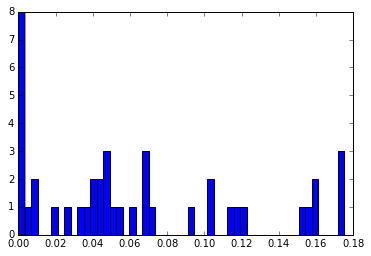

In [11]:
plt.hist(result,bins=50)
plt.show()

In [14]:
MI={}
for i in range(len(result)):
    MI[X.columns.values[i]]=result[i]

In [19]:
to_drop_columns=[]
for key, value in MI.items():
    if value<= 0.08:
        to_drop_columns.append(key)

In [22]:
df=df.drop(to_drop_columns,1)

In [6]:
f = open('MI_kepted_info.csv', 'w')
for key, value in MI.items():
    f.write('{}, {}\n'.format(key,value))
f.flush()

In [9]:
df.to_csv('Finally combined.csv')

### Doing Binning

In [2]:
import pandas as pd
df=pd.read_csv('Finally combined.csv')
df=df.drop(df.columns[0],1)

In [7]:
df1=pd.get_dummies(df['Price Range'],drop_first=True)

In [8]:
new_df=pd.concat([df, df1], axis=1)

In [14]:
new_df=new_df.drop('Price Range',1)

In [16]:
new_df.to_csv('combined_with_dummies.csv')